# Import

In [1]:
%env SM_FRAMEWORK=tf.keras

# 패키지 불러오기
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np 
import pandas as pd
import random
from tqdm import tqdm

from sklearn.model_selection import train_test_split

from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import backend as keras

from glob import glob

import tensorflow_addons as tfa

from scipy import ndimage

import cv2
import cv2 as cv2
import multiprocessing
import os

env: SM_FRAMEWORK=tf.keras


# GPU 설정 확인

In [2]:
import tensorflow as tf

print(tf.__version__)

2.10.0


In [3]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8687305446294111111
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14053015552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 840996202911107613
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4080, pci bus id: 0000:07:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Data load & Preprocessing

### Data Split (최초 1회만 실행)

In [5]:
import random
import os
import shutil

# 데이터 경로
original_path = "./IMAGE_all/"
label_path = "./MASK_all/"

# 분할 비율 (훈련:검증:테스트)
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# 분할된 데이터가 저장될 디렉토리
output_dir = "./data/"

# 랜덤 시드 설정
random_seed = 42
random.seed(random_seed)

In [6]:
''' # 원본 이미지와 마스크 이미지 파일 목록 가져오기
original_files = os.listdir(original_path)
label_files = os.listdir(label_path)

# 데이터 세트의 인덱스를 계산
num_samples = len(original_files)
num_train = int(num_samples * train_ratio)
num_val = int(num_samples * val_ratio)

# 데이터 인덱스 생성
indices = list(range(num_samples))
random.shuffle(indices)

# 분할된 데이터를 저장할 디렉토리 생성
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, "train/images/images"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train/masks/masks"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "validation/images/images"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "validation/masks/masks"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test/images/images"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test/masks/masks"), exist_ok=True) '''

' # 원본 이미지와 마스크 이미지 파일 목록 가져오기\noriginal_files = os.listdir(original_path)\nlabel_files = os.listdir(label_path)\n\n# 데이터 세트의 인덱스를 계산\nnum_samples = len(original_files)\nnum_train = int(num_samples * train_ratio)\nnum_val = int(num_samples * val_ratio)\n\n# 데이터 인덱스 생성\nindices = list(range(num_samples))\nrandom.shuffle(indices)\n\n# 분할된 데이터를 저장할 디렉토리 생성\nos.makedirs(output_dir, exist_ok=True)\nos.makedirs(os.path.join(output_dir, "train/images/images"), exist_ok=True)\nos.makedirs(os.path.join(output_dir, "train/masks/masks"), exist_ok=True)\nos.makedirs(os.path.join(output_dir, "validation/images/images"), exist_ok=True)\nos.makedirs(os.path.join(output_dir, "validation/masks/masks"), exist_ok=True)\nos.makedirs(os.path.join(output_dir, "test/images/images"), exist_ok=True)\nos.makedirs(os.path.join(output_dir, "test/masks/masks"), exist_ok=True) '

In [7]:
''' # 훈련 세트 복사
for i in tqdm(indices[:num_train]):
    original_file = original_files[i]
    label_file = label_files[i]
    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "train/images/images"))
    shutil.copy(os.path.join(label_path, label_file), os.path.join(output_dir, "train/masks/masks"))

# 검증 세트 복사
for i in tqdm(indices[num_train:num_train + num_val]):
    original_file = original_files[i]
    label_file = label_files[i]
    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "validation/images/images"))
    shutil.copy(os.path.join(label_path, label_file), os.path.join(output_dir, "validation/masks/masks"))

# 테스트 세트 복사
for i in tqdm(indices[num_train + num_val:]):
    original_file = original_files[i]
    label_file = label_files[i]
    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "test/images/images"))
    shutil.copy(os.path.join(label_path, label_file), os.path.join(output_dir, "test/masks/masks")) '''

' # 훈련 세트 복사\nfor i in tqdm(indices[:num_train]):\n    original_file = original_files[i]\n    label_file = label_files[i]\n    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "train/images/images"))\n    shutil.copy(os.path.join(label_path, label_file), os.path.join(output_dir, "train/masks/masks"))\n\n# 검증 세트 복사\nfor i in tqdm(indices[num_train:num_train + num_val]):\n    original_file = original_files[i]\n    label_file = label_files[i]\n    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "validation/images/images"))\n    shutil.copy(os.path.join(label_path, label_file), os.path.join(output_dir, "validation/masks/masks"))\n\n# 테스트 세트 복사\nfor i in tqdm(indices[num_train + num_val:]):\n    original_file = original_files[i]\n    label_file = label_files[i]\n    shutil.copy(os.path.join(original_path, original_file), os.path.join(output_dir, "test/images/images"))\n    shutil.copy(os.path.join(label_path, label_file), os.p

### imagedatagenerator

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
train_image_dir = './data/train/images'
train_mask_dir = './data/train/masks'
validation_image_dir = './data/validation/images'
validation_mask_dir = './data/validation/masks'
test_image_dir = './data/test/images'
test_mask_dir = './data/test/masks'

# 이미지 데이터 생성을 위한 ImageDataGenerator 설정
image_datagen = ImageDataGenerator(rescale=1./255)  # 이미지를 0-1 범위로 정규화

In [13]:
image_height = 256
image_width = 256

batch_size = 16

In [14]:
# 원본 이미지 및 마스킹 이미지 불러오기
train_image_generator = image_datagen.flow_from_directory(
    train_image_dir,
    target_size=(image_height, image_width),
    batch_size = batch_size,
    class_mode=None,
    seed=42
)

train_mask_generator = image_datagen.flow_from_directory(
    train_mask_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42,
)

validation_image_generator = image_datagen.flow_from_directory(
    validation_image_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42
)

validation_mask_generator = image_datagen.flow_from_directory(
    validation_mask_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42,
)

test_image_generator = image_datagen.flow_from_directory(
    test_image_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42
)

test_mask_generator = image_datagen.flow_from_directory(
    test_mask_dir,
    target_size=(image_height, image_width),
    class_mode=None,
    batch_size = batch_size,
    seed=42,
)

Found 26399 images belonging to 1 classes.
Found 26399 images belonging to 1 classes.
Found 7542 images belonging to 1 classes.
Found 7542 images belonging to 1 classes.
Found 3773 images belonging to 1 classes.
Found 3773 images belonging to 1 classes.


In [15]:
# 학습 데이터 생성기
train_generator = zip(train_image_generator, train_mask_generator)

# 학습 데이터 생성기
validation_generator = zip(validation_image_generator, validation_mask_generator)

# 학습 데이터 생성기
test_generator = zip(test_image_generator, test_mask_generator)

In [16]:
import math

train_step = math.ceil(train_image_generator.n / batch_size)
valid_step = math.ceil(validation_image_generator.n / batch_size)
test_step = math.ceil(test_image_generator.n / batch_size)

# MeanIou

In [6]:
# MeanIoU 함수 정의
class MeanIoU(object):
    """Mean intersection over union (mIoU) metric.
    Intersection over union (IoU) is a common evaluation metric for semantic
    segmentation. The predictions are first accumulated in a confusion matrix
    and the IoU is computed from it as follows:
        IoU = true_positive / (true_positive + false_positive + false_negative).
    The mean IoU is the mean of IoU between all classes.
    Keyword arguments:
        num_classes (int): number of classes in the classification problem.
    """

    def __init__(self, num_classes):
        super().__init__()

        self.num_classes = num_classes

    def mean_iou(self, y_true, y_pred):
        """The metric function to be passed to the model.
        Args:
            y_true (tensor): True labels.
            y_pred (tensor): Predictions of the same shape as y_true.
        Returns:
            The mean intersection over union as a tensor.
        """

        return tf.compat.v1.py_func(self._mean_iou, [y_true, y_pred], tf.float32)

    def _mean_iou(self, y_true, y_pred):
        """Computes the mean intesection over union using numpy.
        Args:
            y_true (tensor): True labels.
            y_pred (tensor): Predictions of the same shape as y_true.
        Returns:
            The mean intersection over union (np.float32).
        """

        target = np.argmax(y_true, axis=-1).ravel()
        predicted = np.argmax(y_pred, axis=-1).ravel()

        x = predicted + self.num_classes * target
        bincount_2d = np.bincount(
            x.astype(np.int32), minlength=self.num_classes**2
        )
        assert bincount_2d.size == self.num_classes**2
        conf = bincount_2d.reshape(
            (self.num_classes, self.num_classes)
        )

        true_positive = np.diag(conf)
        false_positive = np.sum(conf, 0) - true_positive
        false_negative = np.sum(conf, 1) - true_positive

        with np.errstate(divide='ignore', invalid='ignore'):
            iou = true_positive / (true_positive + false_positive + false_negative)
        iou[np.isnan(iou)] = 1

        return np.mean(iou).astype(np.float32)

# compile에 사용할 mIoU 정의
miou = MeanIoU(num_classes=11)

# U-net

In [7]:
from segmentation_models import PSPNet
from segmentation_models import FPN
from segmentation_models import Linknet
from segmentation_models import Unet

Segmentation Models: using `tf.keras` framework.


In [15]:
base_model = Unet(backbone_name='resnet34', encoder_weights='imagenet', encoder_freeze=True, activation="sigmoid", classes =3)
model = base_model

In [16]:
# Model Compile
model.compile(optimizer=tf.keras.optimizers.Adam(), loss="MSE", metrics=[miou.mean_iou])

In [17]:
# Model Fitting
hist = model.fit(train_generator,
                 steps_per_epoch = train_step,
                 epochs = 50,
                 validation_data = validation_generator,
                 validation_steps = valid_step)

Epoch 1/50
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
1650/1650 [==============================] - 1518s 916ms/step - loss: 0.0087 - mean_iou: 0.7382 - val_loss: 0.0048 - val_mean_iou: 0.7346
Epoch 2/50
1650/1650 [==============================] - 1488s 902ms/step - loss: 0.0044 - mean_iou: 0.7356 - val_loss: 0.0043 - val_mean_iou: 0.7360
Epoch 3/50
1650/1650 [=======

In [18]:
model.save('roadmark_segmentation.h5')

In [19]:
loss, mean_iou, val_loss, val_mean_iou = hist.history.values()

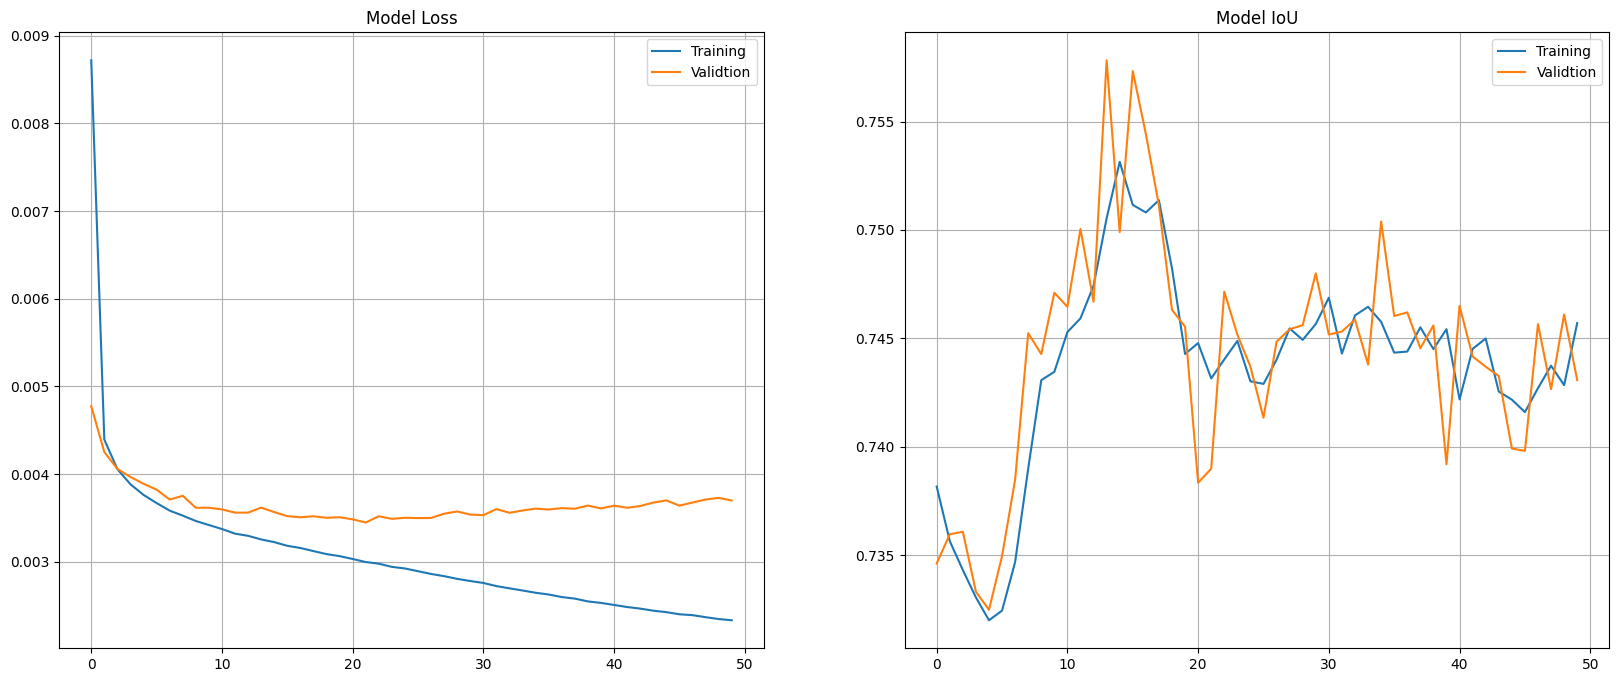

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Model Loss")
plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validtion")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.title("Model IoU")
plt.plot(mean_iou, label="Training")
plt.plot(val_mean_iou, label="Validtion")
plt.legend()
plt.grid()

plt.show()

In [21]:
test_images, test_masks = next(test_generator)

# Model Predict
pred = model.predict_generator(test_images, steps=test_step)

c:\Users\user\.conda\envs\qweqwe\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


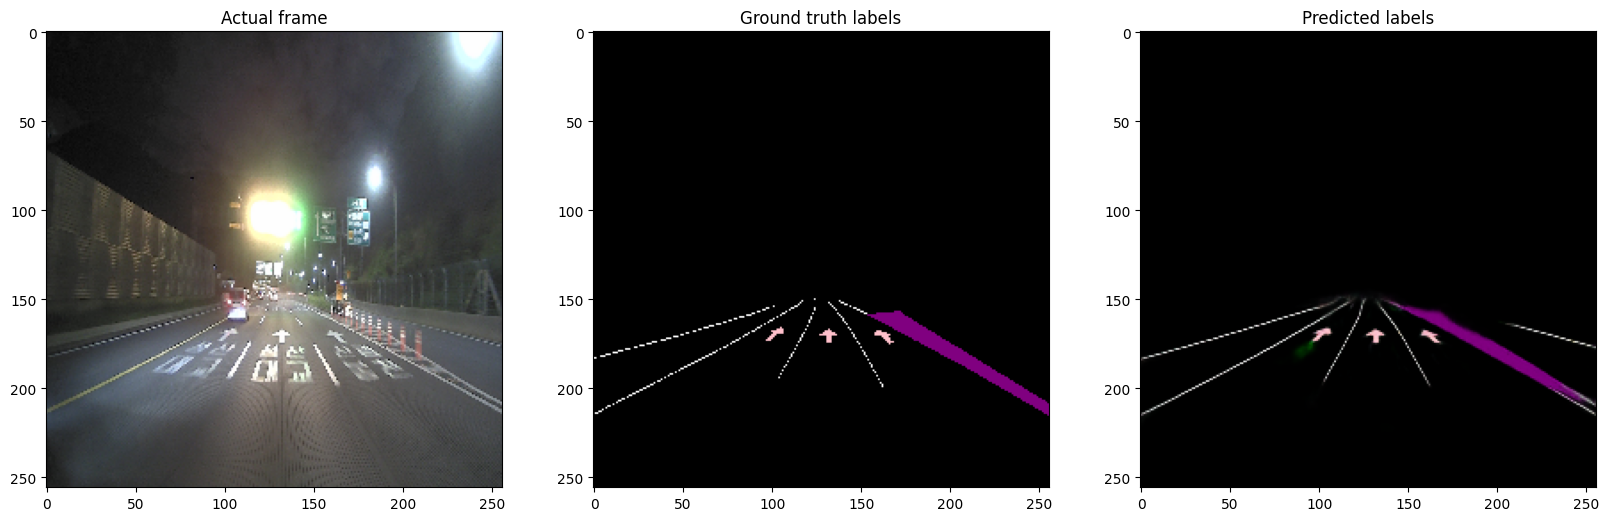

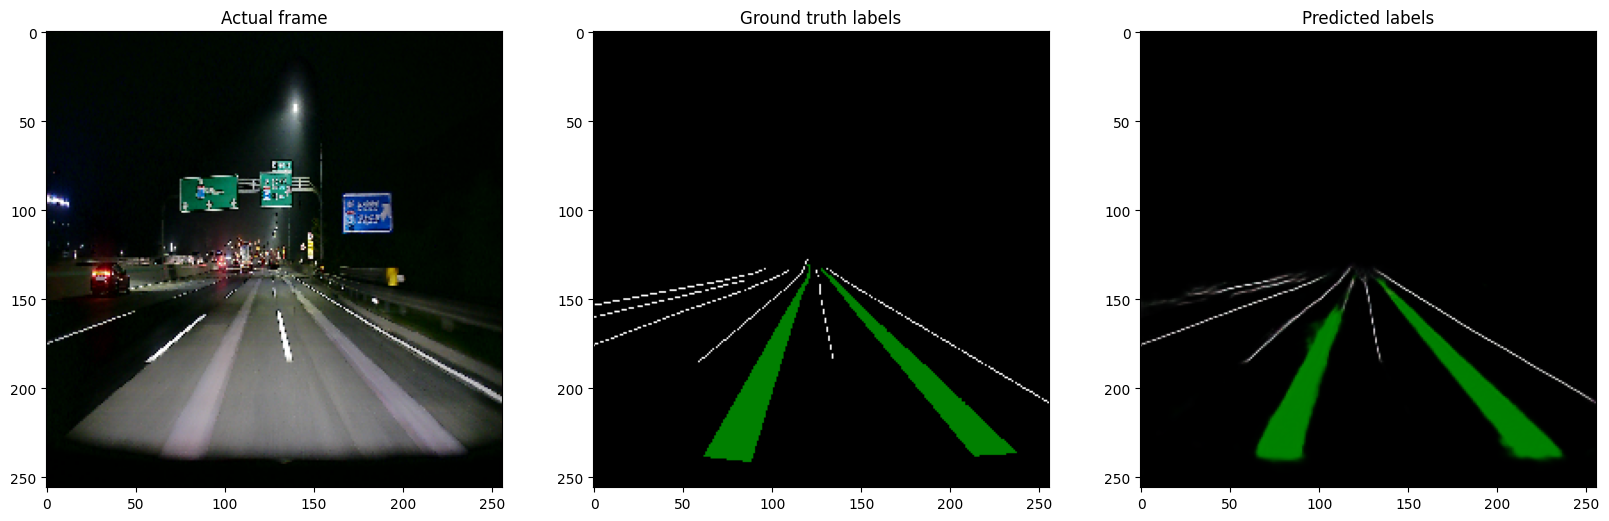

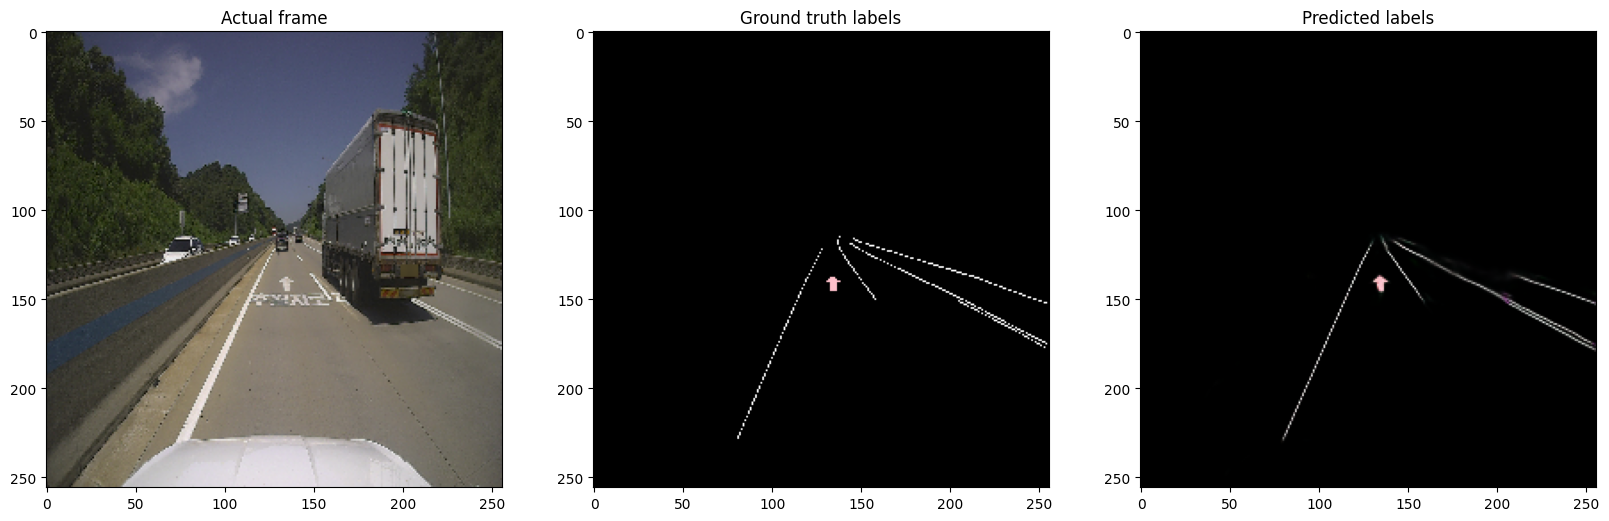

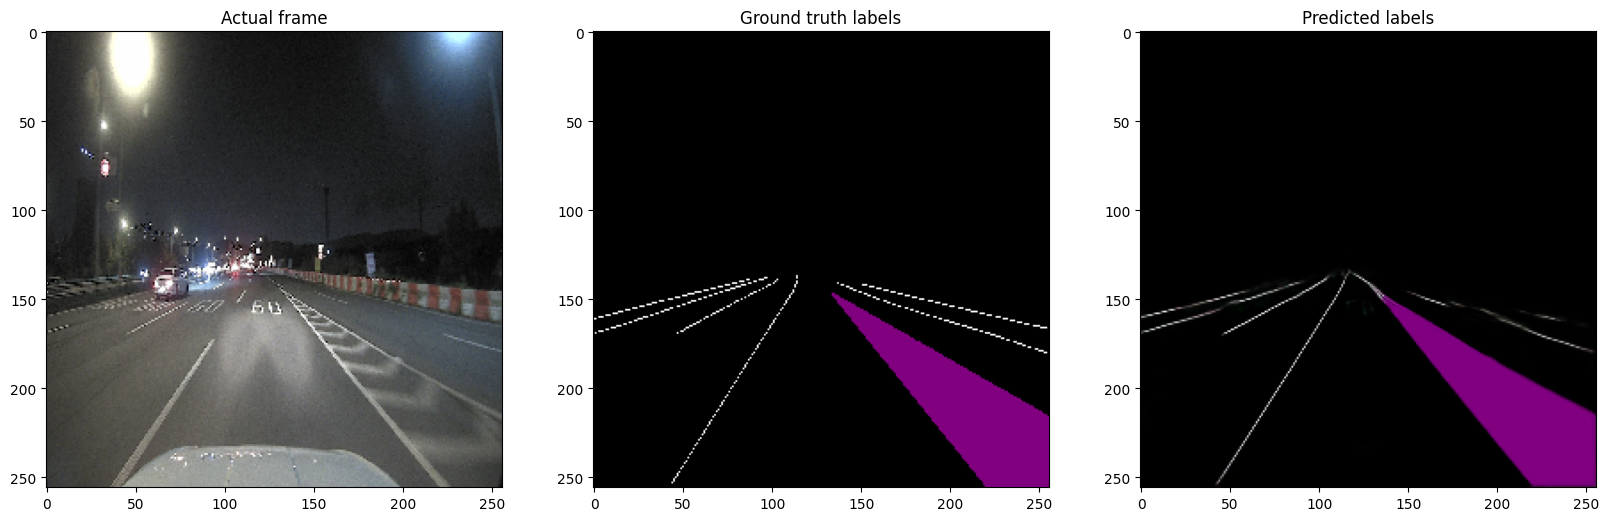

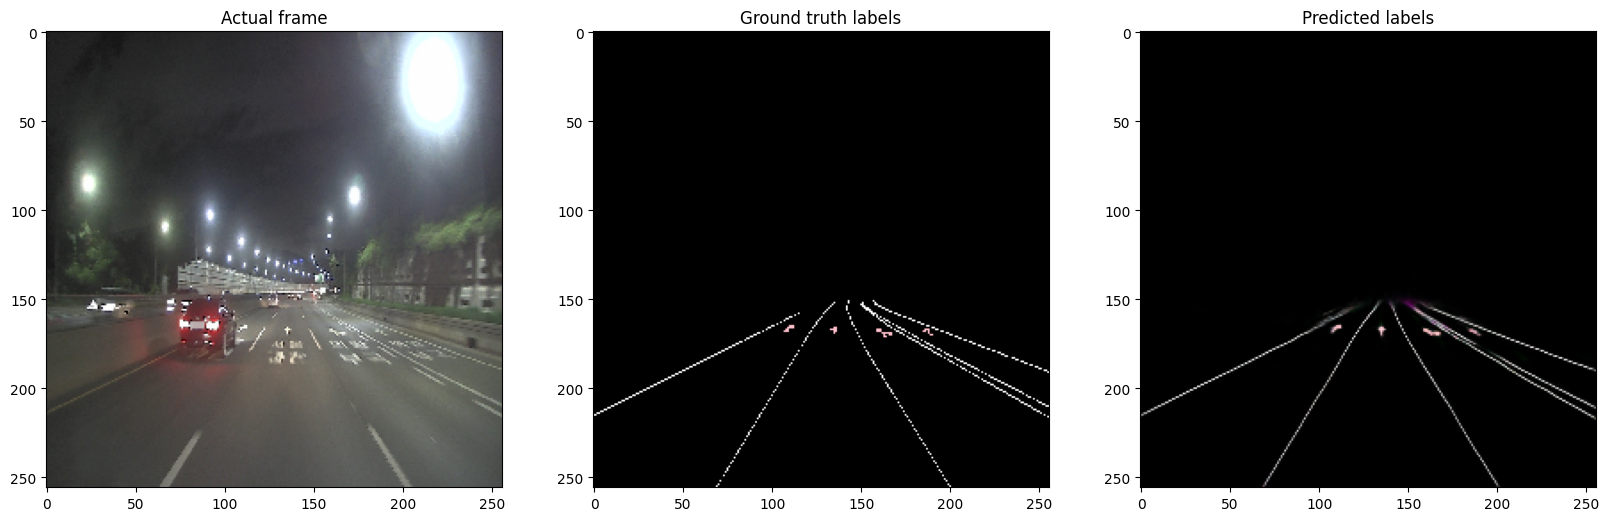

In [22]:
# 랜덤한 5개의 인덱스 선택
random_indices = random.sample(range(len(test_images)), 5)

# 선택된 인덱스에 해당하는 예측 결과 시각화
for i in random_indices:
    fig = plt.figure(figsize=(20, 8))
    
    # 실제 사진 
    ax1 = fig.add_subplot(1, 3, 1)
    ax1.imshow(test_images[i])
    ax1.title.set_text('Actual frame')
    
    # 라벨 사진
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.set_title('Ground truth labels')
    ax2.imshow(test_masks[i])
    
    # 예측 사진
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.set_title('Predicted labels')
    ax3.imshow(pred[i])
    
    plt.show()

### test 셋 pred 결과 저장하기

In [10]:
from tensorflow.keras.models import load_model

# 모델 불러오기
model = load_model('roadmark_segmentation.h5', custom_objects={'mean_iou': miou.mean_iou})

In [19]:
import os

# 결과 저장 경로 설정
result_path = './segmentation_pred_result/'
os.makedirs(result_path, exist_ok=True)

# 테스트 데이터셋 예측 및 결과 저장
for i, (image, mask) in enumerate(test_generator):
    pred = model.predict(image)
    
    for j in range(len(image)):
        fig = plt.figure(figsize=(20, 8))
        
        # 실제 사진 
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.imshow(image[j])
        ax1.title.set_text('Actual frame')
        
        # 라벨 사진
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.set_title('Ground truth labels')
        ax2.imshow(mask[j])
        
        # 예측 사진
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.set_title('Predicted labels')
        ax3.imshow(pred[j])
        
        plt.savefig(f'{result_path}/pred_{i}_{j}.png')
        plt.close(fig)
    
    if i == test_step - 1:
        break

1/1 [==============================] - 0s 27ms/step
